In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
results_path = "/hpc/home/mk423/Anxiety/FullDataWork/Validations/"
results_file = results_path + "final_fixed_30_net_kf_fold_{}_results.pkl"

plots_path = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/"
plots_file = plots_path + "final_fixed_30_net_kf_fold_{}_electome.png"

fold_list = [1,2,3,4]

def mean_sterr_auc(auc_dict):
    temp = []
    n_samps = 0
    for i, key in enumerate(auc_dict.keys()):
        if ~np.isnan(auc_dict[key][0]):            
            temp.append(auc_dict[key])
    mean = np.mean(temp)
    stderr = np.std(temp) / np.sqrt(len(temp))
    return mean, stderr, len(temp)

In [22]:
flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

for fold in fold_list:
    
    resultsDict = pickle.load(open(results_file.format(fold),"rb"))
    print(fold)
    
    flx_mean, flx_sterr, flx_n = mean_sterr_auc(resultsDict['flx_val_auc'])
    print("FLX",flx_mean, flx_sterr, flx_n)
    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([resultsDict['flx_val_auc'][key] for key in resultsDict['flx_val_auc'].keys()])

    epm_mean, epm_sterr, epm_n = mean_sterr_auc(resultsDict['epm_val_auc'])
    print("EPM",epm_mean, epm_sterr, epm_n)
    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([resultsDict['epm_val_auc'][key] for key in resultsDict['epm_val_auc'].keys()])
  
    oft_mean, oft_sterr, oft_n = mean_sterr_auc(resultsDict['oft_val_auc'])
    print("OFT",oft_mean, oft_sterr, oft_n)
    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([resultsDict['oft_val_auc'][key][0] for key in resultsDict['oft_val_auc'].keys()])

    #print(resultsDict["best_epoch"])

1
FLX 0.6791993557378074 0.04381690992241055 3
EPM 0.5686904403253863 0.021038588700420982 7
OFT 0.5600464217457024 0.093900679561842 3
2
FLX 0.6180969597809784 0.1164644681740642 2
EPM 0.5393097762326047 0.02364769788914608 7
OFT 0.6794188080481329 0.05964389625069595 2
3
FLX 0.6432252702339377 0.0052632828108661964 2
EPM 0.537509466035769 0.013947518421095399 6
OFT 0.6643254635071989 0.03020567832059446 4
4
FLX 0.6242246825318015 0.014070166088988168 2
EPM 0.5946913372030682 0.029764710965257183 6
OFT 0.6235738693887513 0.03761927718511436 3


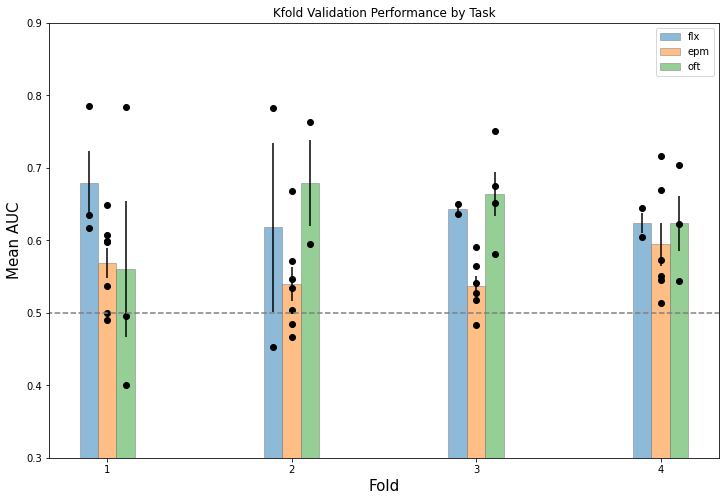

In [27]:
barWidth = 0.1
fig = plt.subplots(figsize=(12,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        edgecolor ='grey', label ='flx',alpha=0.5)
plt.bar(br2, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        edgecolor ='grey', label ='epm',alpha=0.5)
plt.bar(br3, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        edgecolor ='grey', label ='oft',alpha=0.5)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list[fold]))*br2[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list[fold]))*br3[fold],oft_points_list[fold],color="black")

# Adding Xticks
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(flx_auc_list))],
        fold_list)
plt.ylim([0.3,.9])
plt.legend()
plt.title("Kfold Validation Performance by Task")
plt.show()

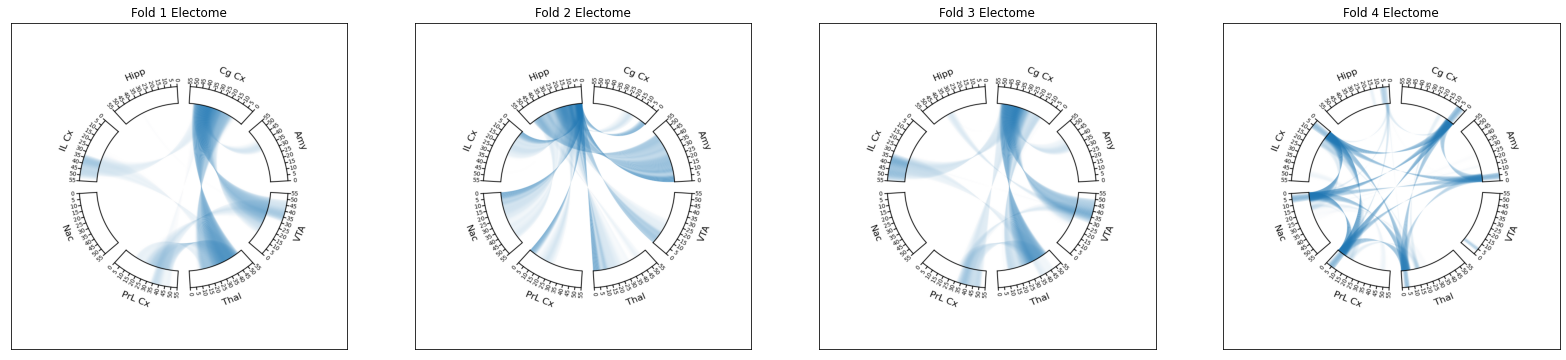

In [26]:
plt.figure(figsize=(35,6))

for i in fold_list:
    plt.subplot(1,5,i)
    im = image.imread(plots_file.format(i))
    plt.imshow(im,aspect="auto")
    plt.title("Fold {} Electome".format(i))
    plt.xticks([])
    plt.yticks([])
plt.show()